# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate

In [2]:
def imread(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [3]:
def plot_img(img, cmap='gray', title=''):
    plt.figure(figsize=(img.shape[0]/30,img.shape[1]/30))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [4]:
jet = imread('jet.png')
kw = imread('kw.png')
moon = imread('moon.png')
lena_noise = imread('lenaSzum.png')
lena = imread('lena.png')
board = imread('plansza.png')

In [5]:
def apply_kernel(img, kernel=None, plot=True, borderType=cv2.BORDER_REPLICATE,
                 show_orig=True, show_dst=True, show_diff=False, dst=None, normalize=None):
    if dst is None:
        assert kernel is not None, 'kernel cannot be None, if you do not pass dst'
        dst = cv2.filter2D(img, -1, kernel, borderType=borderType)
        
        if normalize == 'add128':
            dst = dst + 128
        if normalize == 'abs':
            dst = np.abs(dst)
    
    if plot:
        cols = show_orig + show_dst + show_diff
        
        fig, axs = plt.subplots(ncols=cols, figsize=(cols * 5, 5))
        if not isinstance(axs, np.ndarray):
            axs = [axs]

        if show_orig: 
            index = 0
            axs[index].imshow(img, cmap='gray', vmin=0, vmax=255)
            axs[index].set_title('Original image')

        if show_dst:
            index = int(show_orig)
            axs[index].imshow(dst, cmap='gray', vmin=0, vmax=255)
            axs[index].set_title('Processed image')

        if show_diff:
            index = int(show_orig + show_dst)
            
            df = dst.astype(np.int32) - img.astype(np.int32)
            max_val = np.max(np.abs(df))
            df[0, 0] = max_val
            df[-1, -1] = -max_val
            
            axs[index].imshow(df, cmap='coolwarm')
            axs[index].set_title('Difference')

        plt.show()
    
    return dst

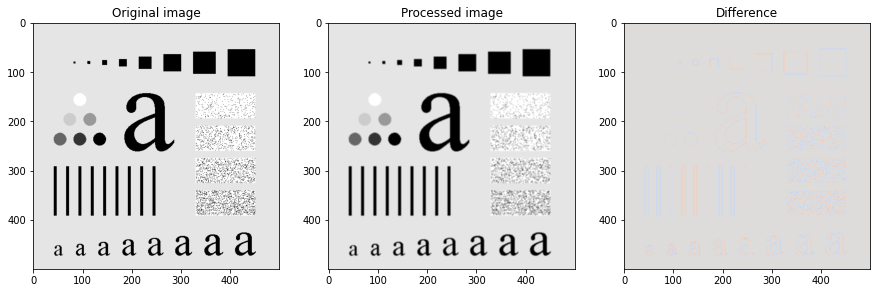

In [6]:
_ = apply_kernel(board, np.ones((3, 3)) / 9, show_diff=True)

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

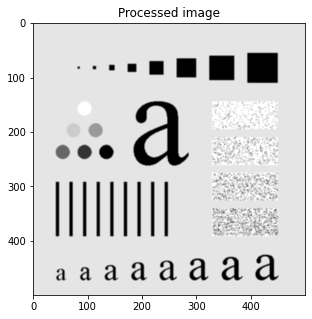

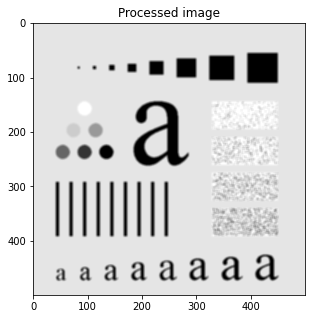

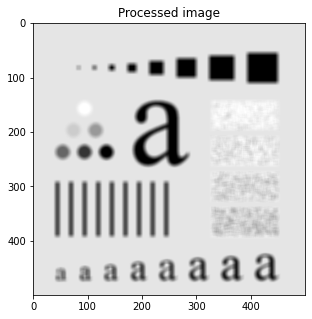

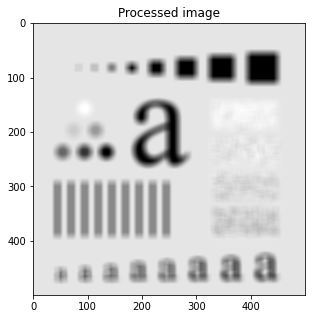

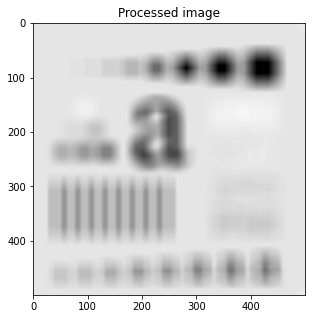

In [7]:
_ = apply_kernel(board, np.ones((3, 3)) / 9,      show_orig=False)
_ = apply_kernel(board, np.ones((5, 5)) / 25,     show_orig=False)
_ = apply_kernel(board, np.ones((9, 9)) / 81,     show_orig=False)
_ = apply_kernel(board, np.ones((15, 15)) / 225,  show_orig=False)
_ = apply_kernel(board, np.ones((35, 35)) / 1225, show_orig=False)

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

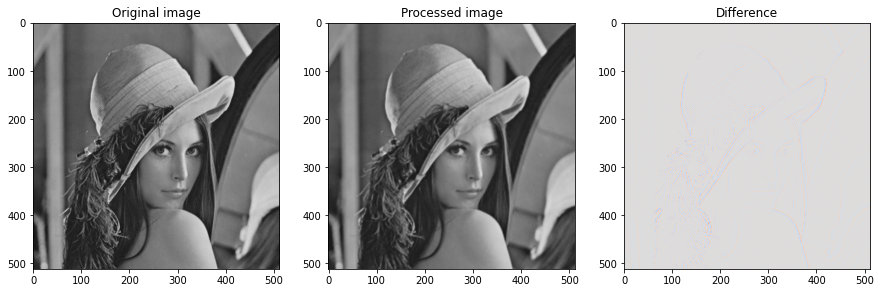

In [8]:
_ = apply_kernel(lena, np.ones((3, 3)) / 9, show_diff=True)

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

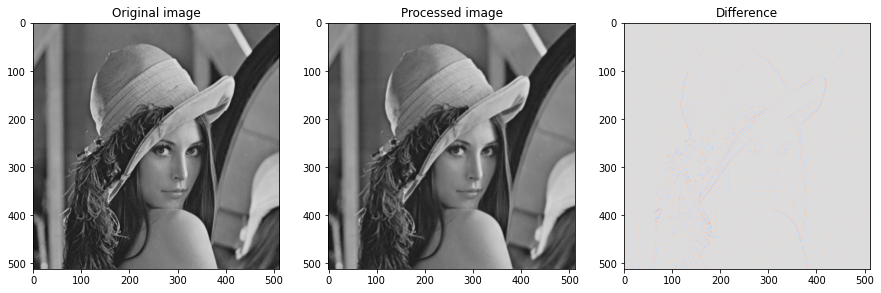

In [9]:
M = np.array([[1, 2, 1], 
              [2, 4, 2], 
              [1, 2, 1]])
_ = apply_kernel(lena, M / np.sum(M), show_diff=True)

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


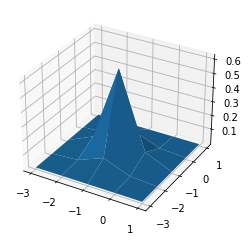

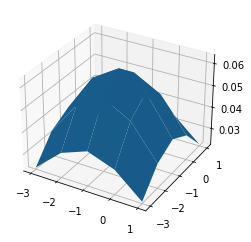

In [10]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    
mesh(fgaussian(5, 0.5), 5)
mesh(fgaussian(5, 2), 5)

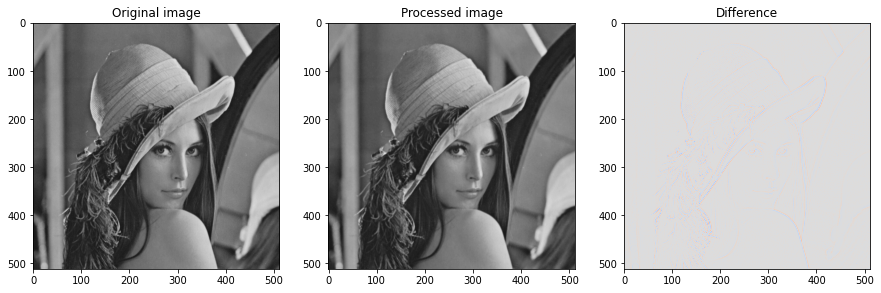

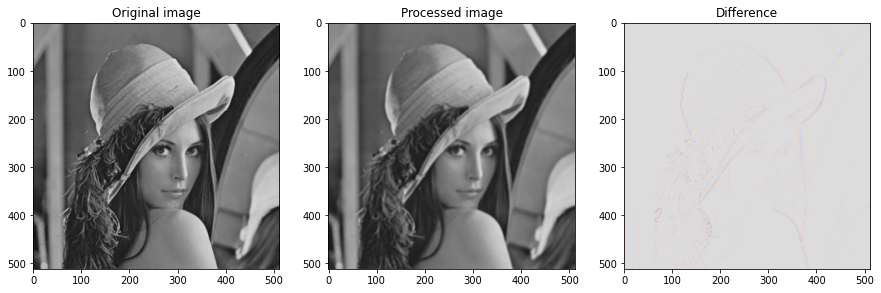

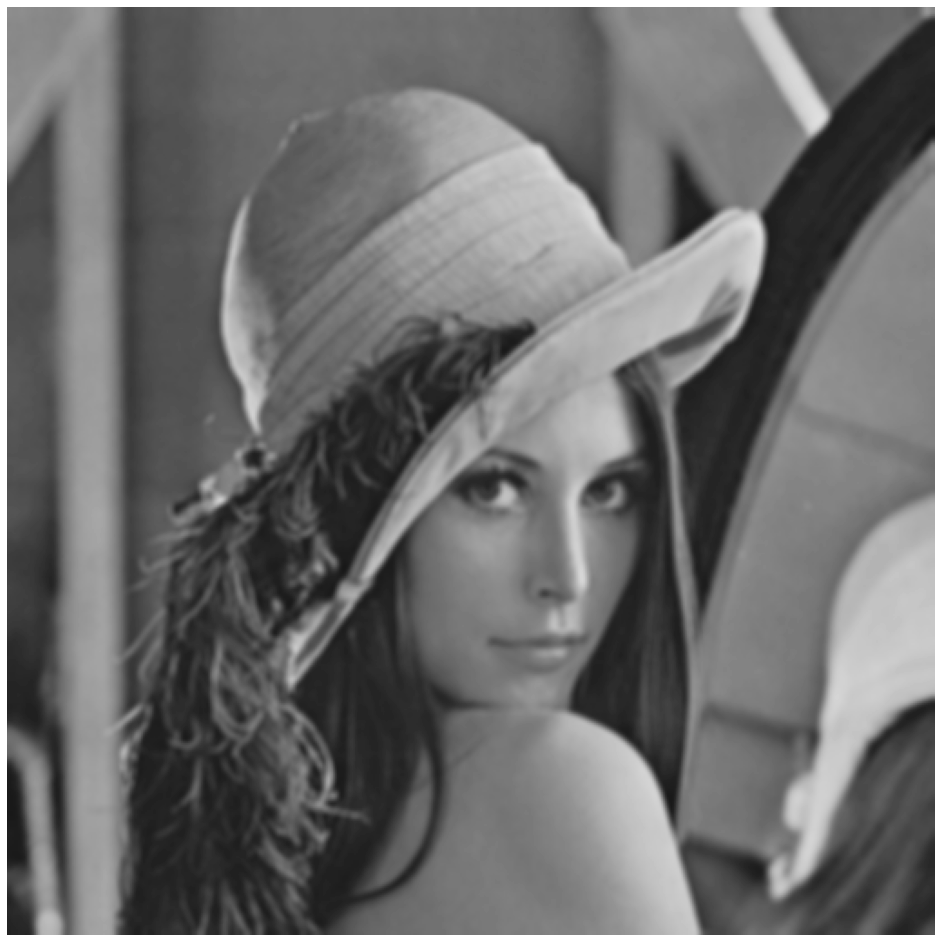

In [11]:
M1 = fgaussian(5, 0.5)
M2 = fgaussian(5, 2)

_ = apply_kernel(lena, M1 / np.sum(M1), show_diff=True)
_ = apply_kernel(lena, M2 / np.sum(M2), show_diff=True)
plot_img(cv2.GaussianBlur(lena, [5, 5], 2))

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


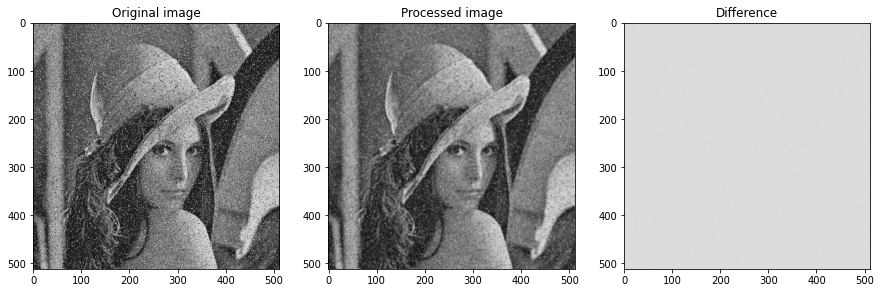

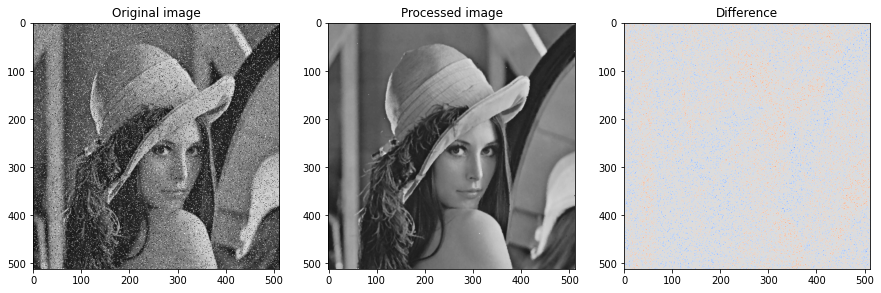

In [12]:
_ = apply_kernel(lena_noise, np.ones((3, 3)) / 9, show_diff=True)

dst = cv2.medianBlur(lena_noise, 3)
_ = apply_kernel(lena_noise, dst=dst, show_diff=True)

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

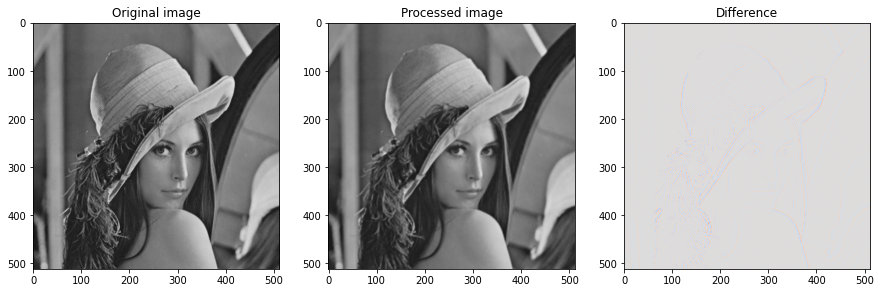

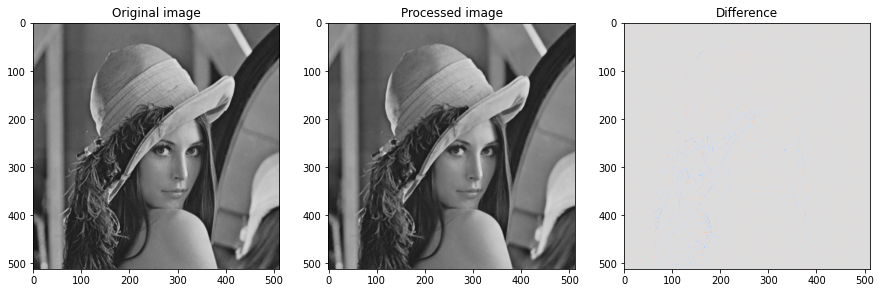

In [13]:
_ = apply_kernel(lena, np.ones((3, 3)) / 9, show_diff=True)

dst = cv2.medianBlur(lena, 3)
_ = apply_kernel(lena, dst=dst, show_diff=True)

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

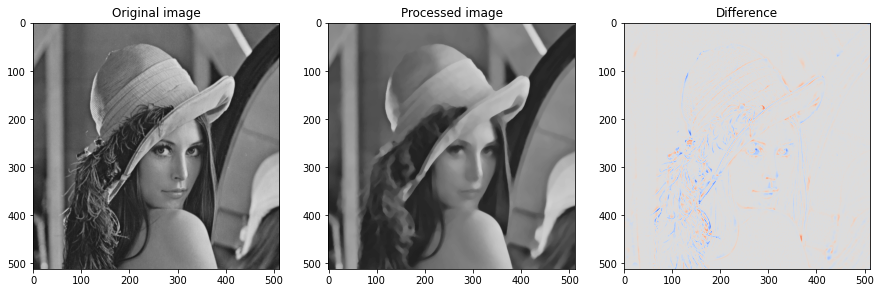

In [14]:
dst = lena

for _ in range(10):
    dst = cv2.medianBlur(dst, 5)
_ = apply_kernel(lena, dst=dst, show_diff=True)

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

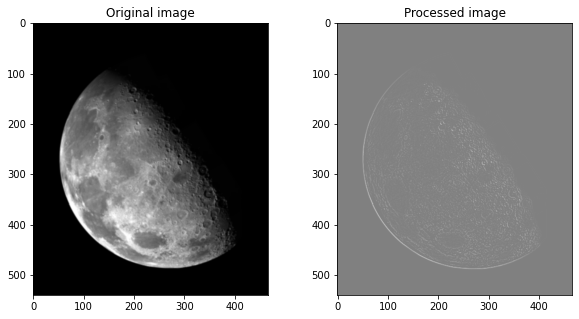

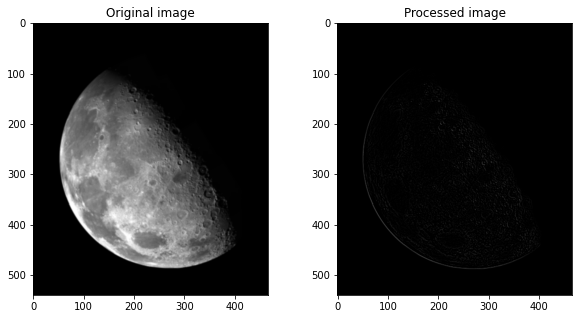

In [15]:
laplasian = np.array([[0,  1, 0],
                      [1, -4, 1],
                      [0,  1, 0]])
_ = apply_kernel(moon, laplasian, normalize='add128')
_ = apply_kernel(moon, laplasian, normalize='abs')

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



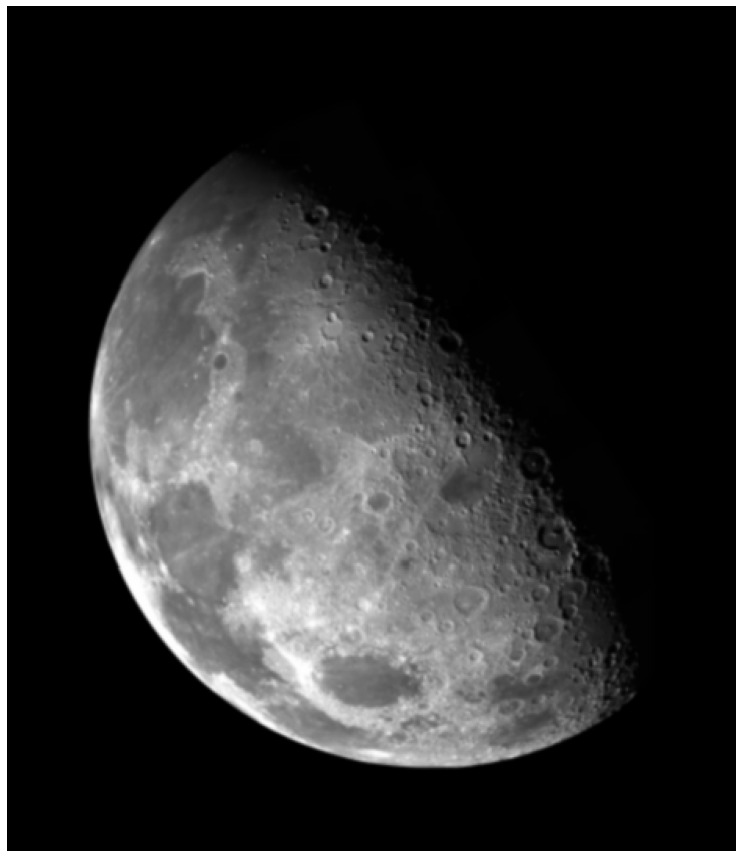

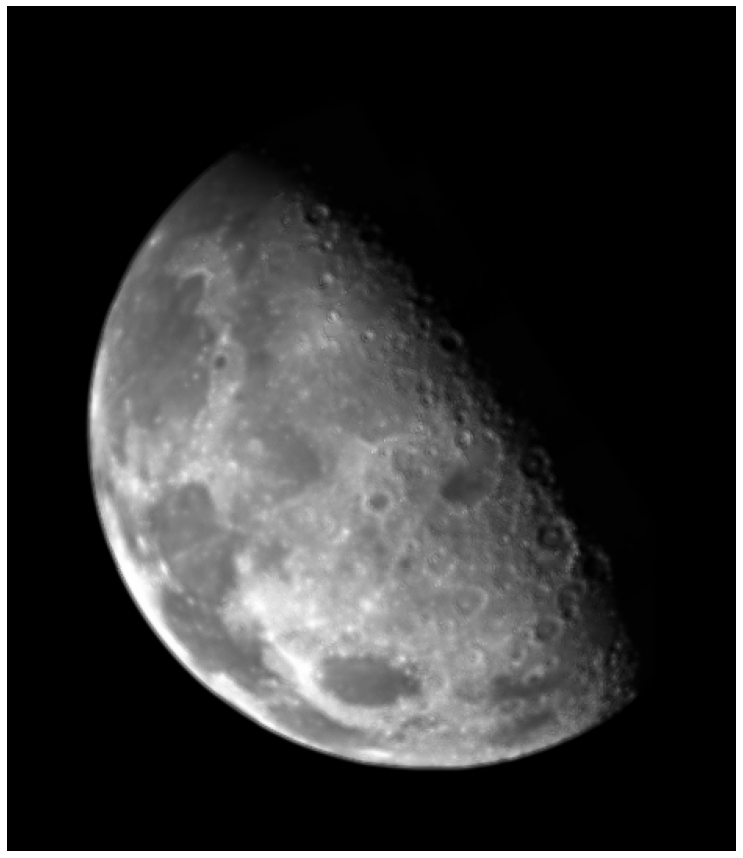

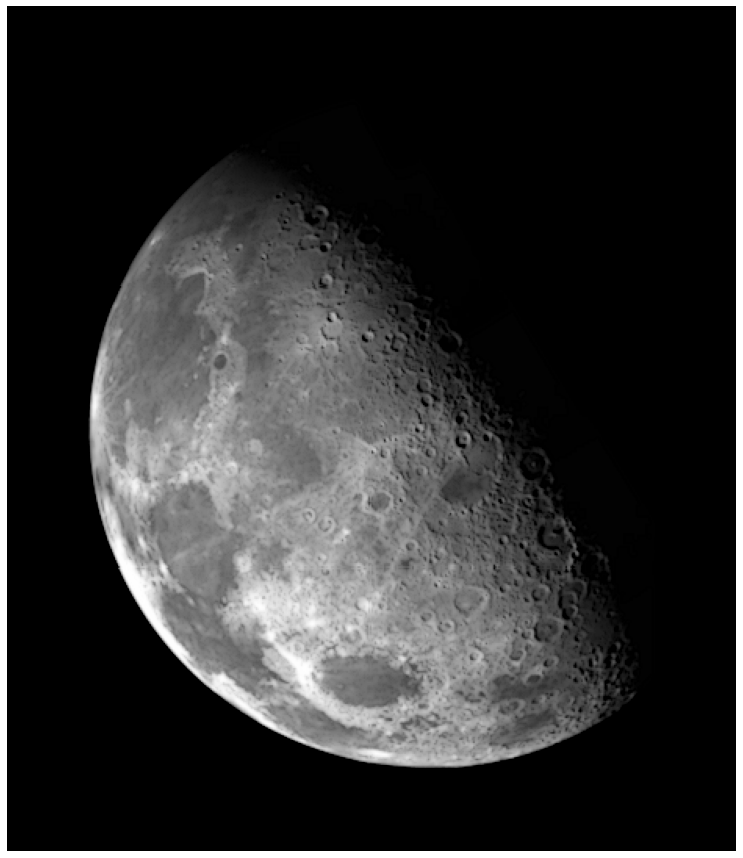

In [16]:
dst = apply_kernel(moon, laplasian, normalize='abs', plot=False)
plot_img(moon)
plot_img(moon.astype(np.int32) + dst)
plot_img(moon.astype(np.int32) - dst)

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [17]:
R1 = np.array([[ 0, 0, 0],
               [-1, 0, 0],
               [ 0, 1, 0]])
R2 = np.array([[ 0, 0,  0],
               [ 0, 0, -1],
               [ 0, 1,  0]])

P1 = np.array([[-1, 0, 0],
               [-1, 0, 0],
               [-1, 1, 0]])
P2 = np.array([[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]])

S1 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
S2 = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

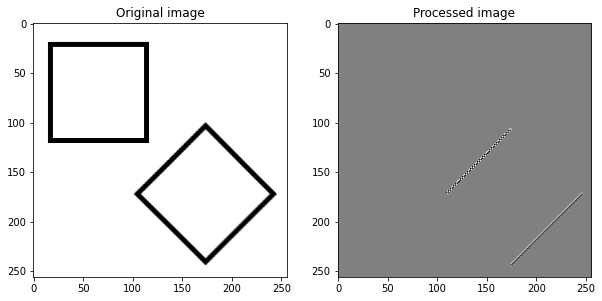

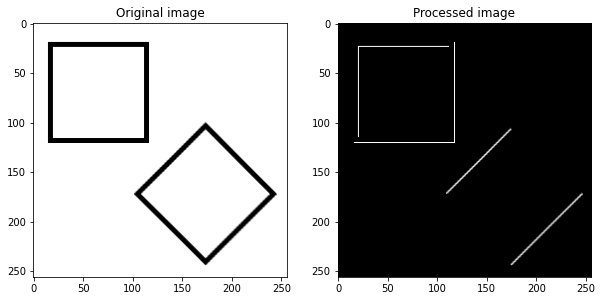

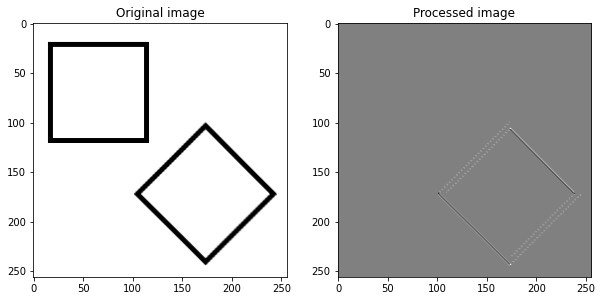

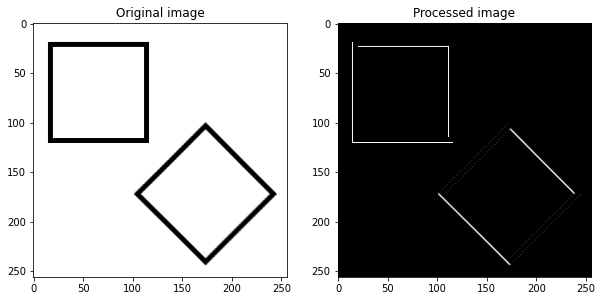

In [18]:
_ = apply_kernel(kw, R1, normalize='add128')
_ = apply_kernel(kw, R1, normalize='abs')

_ = apply_kernel(kw, R2, normalize='add128')
_ = apply_kernel(kw, R2, normalize='abs')

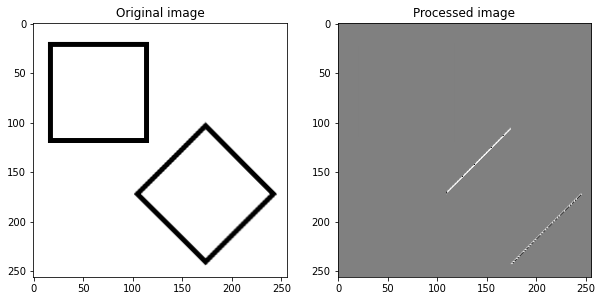

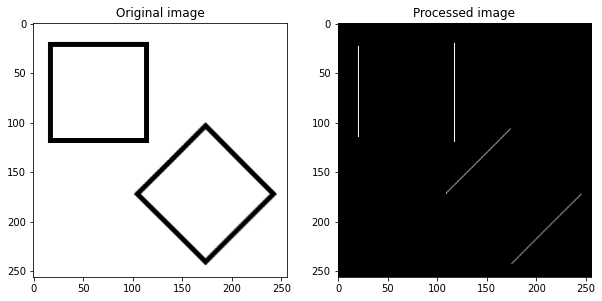

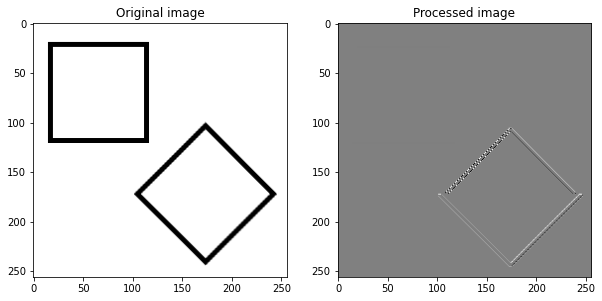

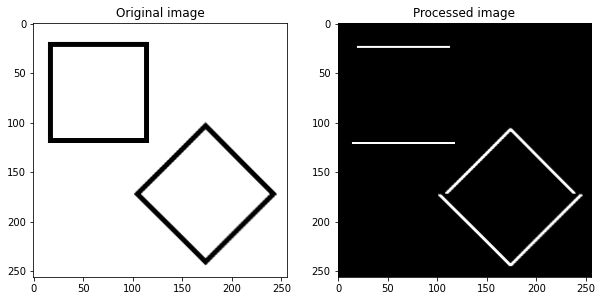

In [19]:
_ = apply_kernel(kw, P1, normalize='add128')
_ = apply_kernel(kw, P1, normalize='abs')

_ = apply_kernel(kw, P2, normalize='add128')
_ = apply_kernel(kw, P2, normalize='abs')

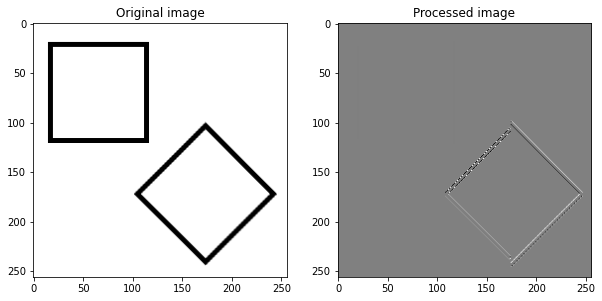

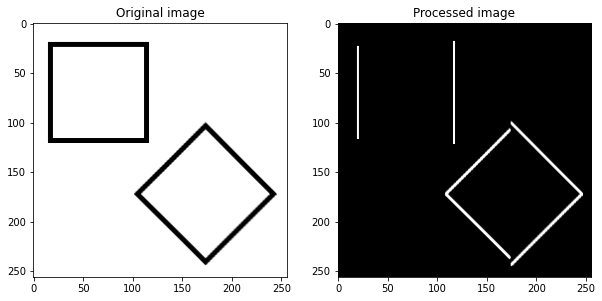

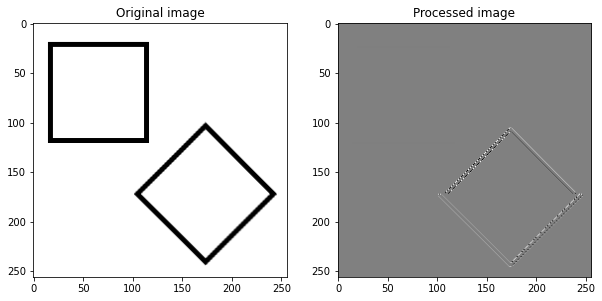

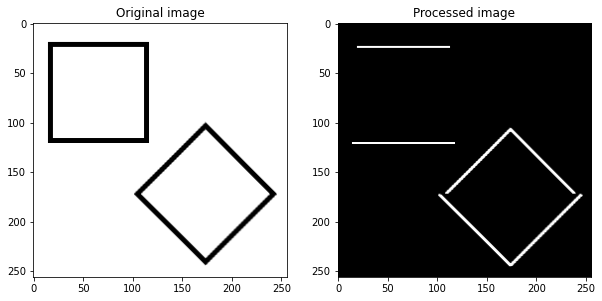

In [20]:
_ = apply_kernel(kw, S1, normalize='add128')
_ = apply_kernel(kw, S1, normalize='abs')

_ = apply_kernel(kw, S2, normalize='add128')
_ = apply_kernel(kw, S2, normalize='abs')

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



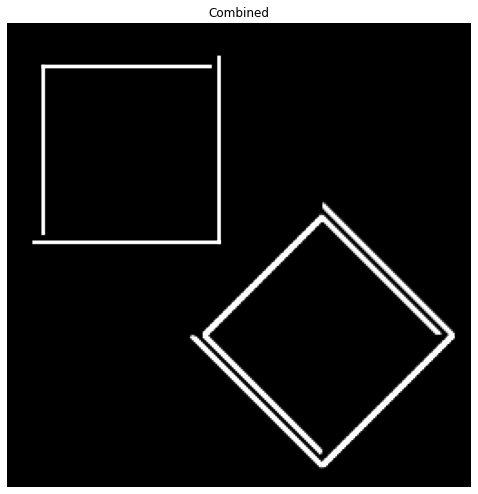

In [21]:
img_s1 = apply_kernel(kw, S1, normalize='abs', plot=False)
img_s2 = apply_kernel(kw, S2, normalize='abs', plot=False)

combined = np.sqrt(np.square(img_s1.astype(np.int32)) + np.square(img_s2.astype(np.int32)))
plot_img(combined, title='Combined')

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

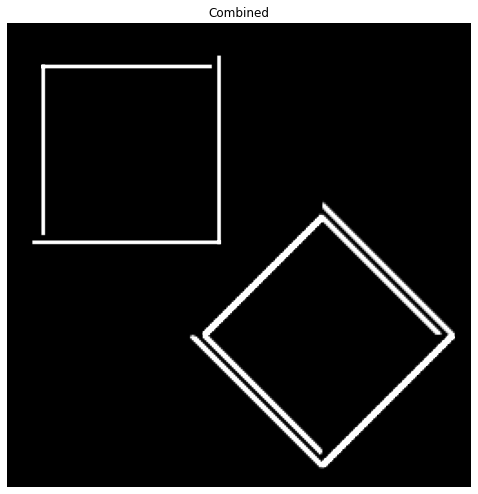

In [22]:
img_s1 = apply_kernel(kw, S1, normalize='abs', plot=False)
img_s2 = apply_kernel(kw, S2, normalize='abs', plot=False)

combined = np.abs(img_s1.astype(np.int32)) + np.abs(img_s2.astype(np.int32))
plot_img(combined, title='Combined')

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

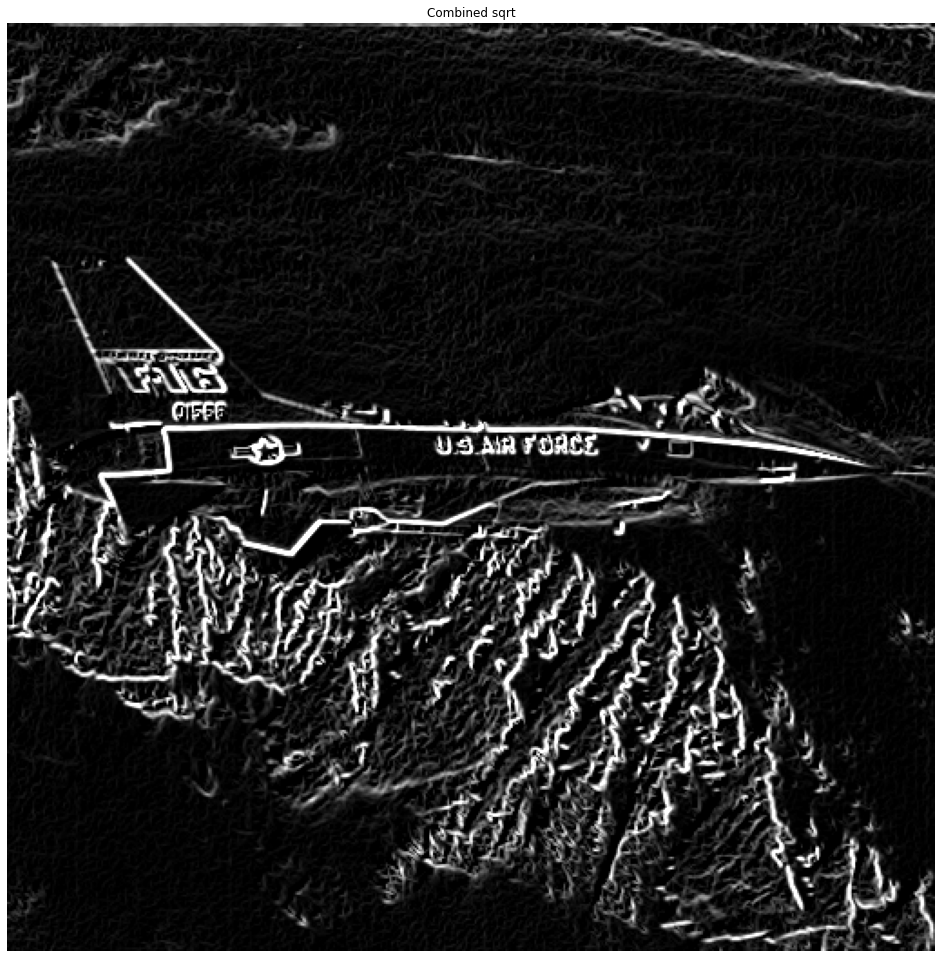

In [23]:
img_s1 = apply_kernel(jet, S1, normalize='abs', plot=False)
img_s2 = apply_kernel(jet, S2, normalize='abs', plot=False)

combined = np.sqrt(np.square(img_s1.astype(np.int32)) + np.square(img_s2.astype(np.int32)))
plot_img(combined, title='Combined sqrt')

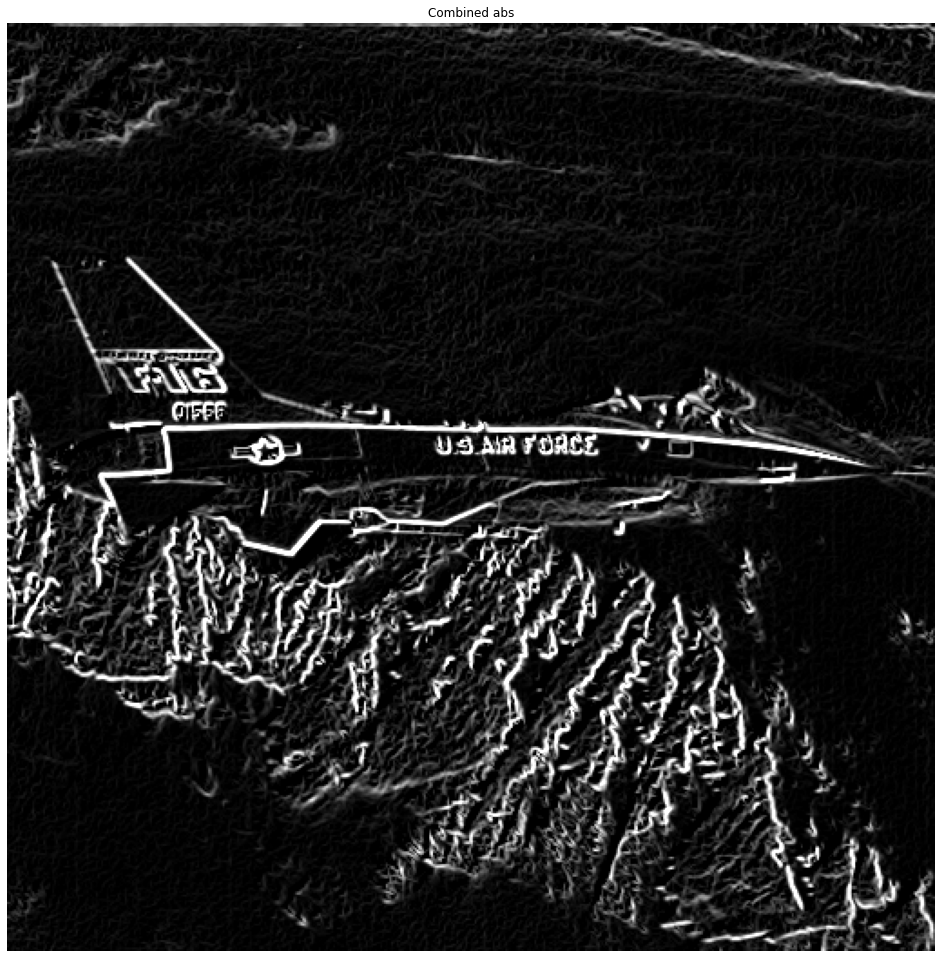

In [24]:
img_s1 = apply_kernel(jet, S1, normalize='abs', plot=False)
img_s2 = apply_kernel(jet, S2, normalize='abs', plot=False)

combined = np.sqrt(np.square(img_s1.astype(np.int32)) + np.square(img_s2.astype(np.int32)))
plot_img(combined, title='Combined abs')